In [1]:
!pip install ultralytics
import ultralytics
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot
import PIL
import cv2
from ultralytics import YOLO
!pip install roboflow



In [2]:
model1=YOLO('best1.pt')

model2=YOLO('best (1).pt')

In [3]:
def predictor_two_wheeler(image):
    ans=True
    img=cv2.imread(image)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_copy=img.copy()
    result1=model1.predict(img,show_boxes=True)
    print(result1[0].boxes)
    two_wheel_box=result1[0].boxes.xywhn.tolist()
    vehicle_detect_cls=result1[0].boxes.cls.tolist()
    if vehicle_detect_cls.count(1)== 0:
        return True,img
    else:
        for cls_prob,b_box in zip(vehicle_detect_cls,two_wheel_box):
            if cls_prob == 1:
                dh,dw,_=img.shape
                lx,ly,rx,ry=b_box_cord(b_box,dh,dw)
                crop_img=img_copy[ly:ry,lx:rx]
                val,p_img=predict_without_helmet(crop_img)
                if val == False:
                    ans=False
                    #pyplot.imshow(crop_img)
                    pyplot.imshow(p_img)
                    pyplot.show()
                    
    return ans              
                    

In [4]:
def predict_without_helmet(image):
    ans=True
    result2=model2.predict(image,show_boxes=True)
    cls_m2=result2[0].boxes.cls.tolist()
    print(result2[0].boxes)
    bounding_boxes=result2[0].boxes.xywhn.tolist()
    if cls_m2.count(1)==0:
        return True,image
    else:
        for cls_,b_box in zip(cls_m2,bounding_boxes):
            print(cls_)
            if cls_ == 1:
                ans=False
                dh,dw,_=image.shape
                lx,ly,rx,ry=b_box_cord(b_box,dh,dw)
                print(b_box)
                cv2.rectangle(image,(lx,ly),(rx,ry),(255,0,0),3)
                #cv2.rectangle(image,(int(b_box[0]-b_box[2]/2),int(b_box[1]-b_box[3]/2)),(int((b_box[0]-b_box[2]/2)+b_box[2]),int((b_box[1]-b_box[3]/2)+b_box[3])),(255,0,0),3)
                
    return ans,image
    

In [21]:
def b_box_cord(values,dh,dw):
    
    lx=int((values[0]-values[2]/2)*dw)
    ly=int((values[1]-values[3]/2)*dh)
    rx=int((values[0]+values[2]/2)*dw)
    ry=int((values[1]+values[3]/2)*dh)
    if lx<0:
        lx=0
    if rx>dw-1:
        rx=dw-1
    if ly<0:
        ly=0
    if ry>dh-1:
        ry=dh-1
    return lx,ly,rx,ry

x=predictor_two_wheeler('datasets/Helmet_Detection-1/test/images/90_jpg.rf.0988b06c508501610054e2a288840189.jpg')
!pip install requests
import requests
url="         fhenf "
#if x==False:
    #request.call("  ")
x[0]



0: 640x640 1 emergency, 623.7ms
Speed: 5.5ms preprocess, 623.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9316])
data: tensor([[  3.6497, 101.1760, 640.0000, 541.4250,   0.9316,   0.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[321.8248, 321.3005, 636.3503, 440.2490]])
xywhn: tensor([[0.5029, 0.5020, 0.9943, 0.6879]])
xyxy: tensor([[  3.6497, 101.1760, 640.0000, 541.4250]])
xyxyn: tensor([[0.0057, 0.1581, 1.0000, 0.8460]])


True

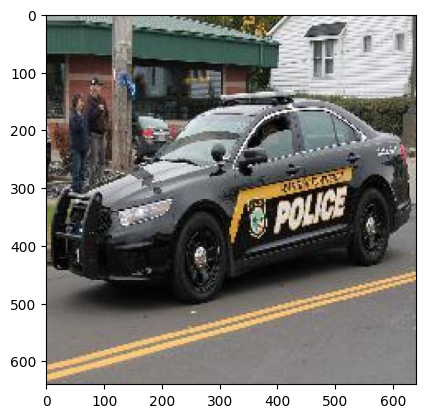

In [18]:
p=PIL.Image.open('datasets/Helmet_Detection-1/test/images/90_jpg.rf.0988b06c508501610054e2a288840189.jpg')
pyplot.imshow(p)